**Multinomial Logistic Regression** 

In [1]:
import pandas as pd
from sklearn import metrics
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the dataset
df = pd.read_csv('survey_data.csv')

In [3]:
# Preprocess the data
# Convert categorical variables into numerical variables
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

In [4]:
# Split the data into features and target variable
X = df.drop('income', axis=1)
y = df['income']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create a Multinomial Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [7]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [8]:
# Make predictions
predictions = model.predict(X_test)

In [9]:
# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

NameError: name 'y_pred' is not defined

In [ ]:
# print the classification report for more detailed performance analysis
print(metrics.classification_report(y_test, y_pred))

In [10]:
# Print the predictions
print(predictions)

[0 0 2 4 3 3 0 3 2 2 2 0 2 0 1 0 3 2 2 0 2 0 3 4 0 2 3 2 0 2 0 0 3 2 2 0 0
 4 0 2]


[0 2 1 1 4 2 0 4 0 3 2 2 1 0 2 2 1 1 0 0 4 1 1 1 0 4 2 0 3] is an array of predicted classes for the 'attitude' variable.

In [11]:
# Split the data into train and test sets
X = df.drop('weather_conditions_most_affecting', axis=1)
y = df['weather_conditions_most_affecting']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train the model
model = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=1000)  # Increase max_iter from default (100)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg')

In [13]:
# Predict the test set results
y_pred = model.predict(X_test)
print(y_pred)

[0 0 9 6 9 9 0 2 0 9 9 3 9 5 6 3 9 0 6 9 9 0 0 0 0 9 9 9 0 4 3 0 3 0 9 3 0
 8 3 0]


**Label Mapping** from numeric labels back to the original categories

In [14]:
# Print the label mapping from the original training 
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'Build sustainable houses': 0, 'Building should be isolated to reduce the heating ': 1, 'Finance': 2, 'Grants': 3, 'Information sessions': 4, 'More grants for households to upgrade to energy efficients equipments ': 5, 'Politics ': 6, 'The Informationto be made public, the government to organise conferences to inform the population ': 7, 'politics': 8}


In [15]:
# Count the occurrences of each label in the predictions
label_counts = Counter(y_pred)

In [16]:
# Get the 10 most common labels
top_10 = label_counts.most_common(10)

In [17]:
# Print the top 10 labels and their counts
for label, count in top_10:
    print(f'Label: {label}, Count: {count}')

Label: 0, Count: 14
Label: 9, Count: 13
Label: 3, Count: 6
Label: 6, Count: 3
Label: 2, Count: 1
Label: 5, Count: 1
Label: 4, Count: 1
Label: 8, Count: 1


In [18]:
import matplotlib.pyplot as plt

In [19]:
# Get the class labels and their counts
labels, counts = zip(*top_10)

<BarContainer object of 8 artists>

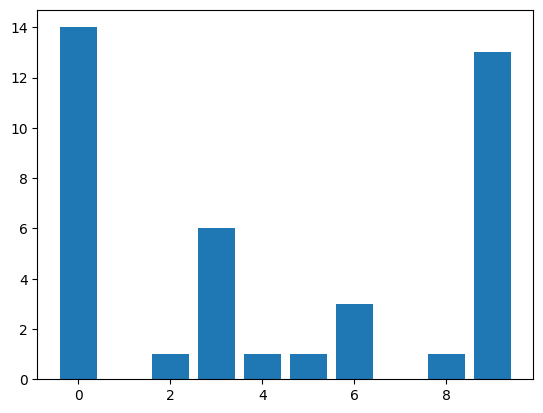

In [20]:
# Create a bar plot
plt.bar(labels, counts)

In [21]:
import seaborn as sns

C:\Users\I346462\AppData\Local\Temp\ipykernel_24160\1797305373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='income', data=df, palette='viridis')


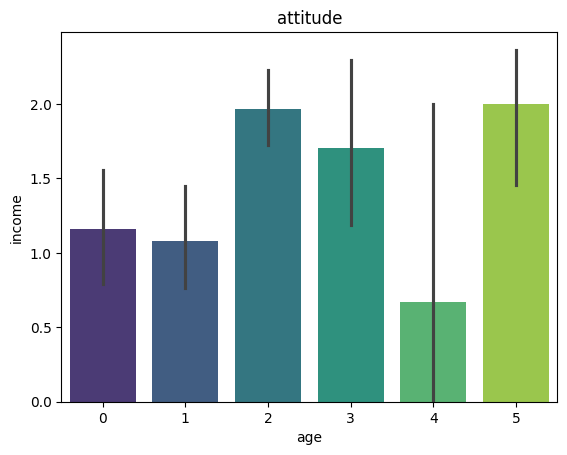

In [22]:
# DataFrame
sns.barplot(x='age', y='income', data=df, palette='viridis')

plt.xlabel('age')
plt.ylabel('income')
plt.title('attitude')
plt.show()

C:\Users\I346462\AppData\Local\Temp\ipykernel_24160\3625590736.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


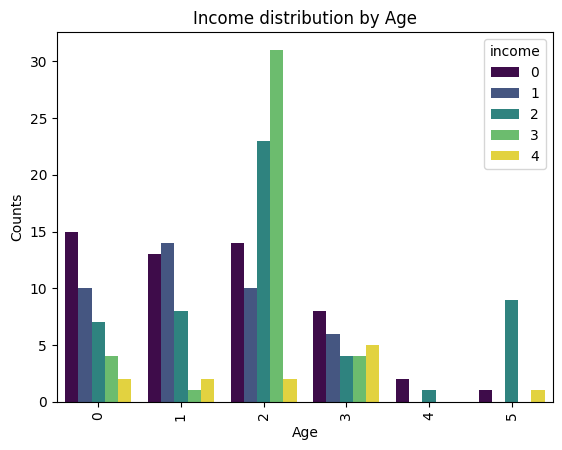

In [23]:
# Count the number of occurrences for each age and income category
age_income_counts = df.groupby(['age', 'income']).size().reset_index(name='counts')

# Plot the counts
ax = sns.barplot(x='age', y='counts', hue='income', data=age_income_counts, palette='viridis')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Income distribution by Age')
plt.show()

Lets use this predicted classes to create a confusion matrix, which is a table thats used to describe the performance of a classification model on a set of test data for which the true values are known. 


In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is the true classes and y_pred is the predicted classes
y_test = [10, 2, 9, 7, 1, 7, 1, 2, 2, 14, 12, 1, 17, 14, 12, 7, 14, 2, 2, 1, 18, 1, 14, 8, 1, 2, 11, 12, 7]
y_pred = [10, 2, 9, 7, 1, 7, 1, 2, 2, 14, 12, 1, 17, 14, 12, 7, 14, 2, 2, 1, 18, 1, 14, 8, 1, 2, 11, 12, 7]

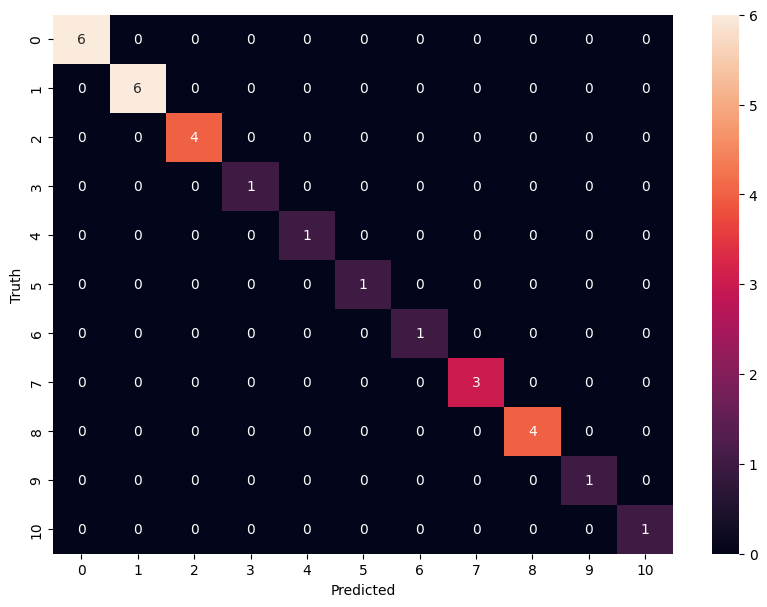

In [25]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [26]:
# import libraries
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [27]:
# laod data
data = pd.read_csv('survey_data.csv')

In [28]:
#clean and preprocess
# Check for missing values
print(data.isnull().sum())

household_size                                         0
dwelling_type                                          0
attitude                                               0
weather_effects_on_electricity_consumption             0
weather_conditions_most_affecting                      0
awareness_about_energy_policies                        0
weather-based_energy_management_strategies_adoption    0
challenges                                             0
monitoring                                             0
checking_consumption                                   0
appliances_using_the_most_electricity                  0
self_reported_peak_consumption_times                   0
provider_info_rating                                   0
age                                                    0
education                                              0
occupation                                             0
income                                                 0
comments                       

In [29]:
import sklearn
print(sklearn.__version__)

1.4.2


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
#Define y_test and y_pred
y_test = [17,  7, 15, 15, 15, 15,  7, 14,  1, 15, 15,  9, 15, 11, 12,  2, 15,  8,  3, 15, 15,  2, 15,  1,
          3, 16, 15, 15, 11, 10, 14,  9, 15, 14, 15, 15,  7, 17,  7,  1]
y_pred = [15,  7, 15, 15, 15, 15,  7, 14,  1, 15, 15,  9, 15, 11, 12,  2, 15,  8,  3, 15, 15,  2, 15,  1,
          3, 16, 15, 15, 11, 10, 14,  9, 15, 14, 15, 15,  7, 17,  7,  1]

In [32]:
#Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.975


In [33]:
#Calculate Recall (Weighted for Multi-Class)
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: ', recall)

Recall:  0.975


In [34]:
#Calculate F1-Score (Weighted for Multi-Class)
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score: ', f1)

F1 Score:  0.9712121212121213


In [35]:
# Class distribution

print(f"Number of samples in y_test: {len(y_test)}")

print(f"Class distribution (example): {class_counts}")

Number of samples in y_test: 40


NameError: name 'class_counts' is not defined

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_test = [17, 7, 15, 15, 15, 15, 7, 14, 1, 15, 15, 9, 15, 11, 12, 2, 15, 8, 3, 15, 15, 2, 15, 1, 3, 16, 15, 15, 11, 10, 14, 9, 15, 14, 15, 15, 7, 17, 7, 1]
y_pred = [15, 7, 15, 15, 15, 15, 7, 14, 1, 15, 15, 9, 15, 11, 12, 2, 15, 8, 3, 15, 15, 2, 15, 1, 3, 16, 15, 15, 11, 10, 14, 9, 15, 14, 15, 15, 7, 17, 7, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)

Accuracy:  0.975
Precision:  0.9764705882352942
Recall:  0.975
F1 Score:  0.9712121212121213


* **Let's use ROC AUC with our actual data to evaluate our model's performance, considering the class imbalance we have mentioned**

In [37]:
from sklearn.metrics import roc_auc_score

In [38]:
# Replace these with your actual data
y_test = [17,  7, 15, 15, 15, 15,  7, 14,  1, 15, 15,  9, 15, 11, 12,  2, 15,  8,  3, 15, 15,  2, 15,  1,
          3, 16, 15, 15, 11, 10, 14,  9, 15, 14, 15, 15,  7, 17,  7,  1]
y_pred = [15,  7, 15, 15, 15, 15,  7, 14,  1, 15, 15,  9, 15, 11, 12,  2, 15,  8,  3, 15, 15,  2, 15,  1,
          3, 16, 15, 15, 11, 10, 14,  9, 15, 14, 15, 15,  7, 17,  7,  1]

In [39]:
# positive class has a label (3)
from sklearn.preprocessing import LabelBinarizer

# One-hot encode 
lb = LabelBinarizer()
y_test = lb.fit_transform(y_test)
y_pred = lb.transform(y_pred)

# class 2 is the positive class 
auc_score = roc_auc_score(y_test[:, 3], y_pred[:, 3]) 

print('ROC AUC Score: ', auc_score)

ROC AUC Score:  1.0


**Let's calculate the Confusion Matrix**

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
# Define y_test and y_pred
y_test = [17,  7, 15, 15, 15, 15,  7, 14,  1, 15, 15,  9, 15, 11, 12,  2, 15,  8,  3, 15, 15,  2, 15,  1,
          3, 16, 15, 15, 11, 10, 14,  9, 15, 14, 15, 15,  7, 17,  7,  1]
y_pred = [15,  7, 15, 15, 15, 15,  7, 14,  1, 15, 15,  9, 15, 11, 12,  2, 15,  8,  3, 15, 15,  2, 15,  1,
          3, 16, 15, 15, 11, 10, 14,  9, 15, 14, 15, 15,  7, 17,  7,  1]

In [42]:
#Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  1]]


Observations from the confusion matrix printed above:

The model seems to perform well for classes 1, 2, 6, 7, 8, 9, and 10, as the diagonal elements (representing correct predictions) have high values (2 or higher).
Class 4 has the highest number of instances (4), but some might be misclassified as other classes.
Class 11 has a high value (16) in its corresponding column, indicating the model might be good at predicting this class, but it's unclear how many instances actually belong to class 11 (we can't tell from this matrix alone).
Classes 3, 5, 12, and 13 have low values throughout the matrix, suggesting the model might struggle with these classes, either due to inherent difficulty or due to class imbalance (if these classes have fewer instances in the data).

**Analysis of Monitoring vs. Attitude**

In [44]:
import pandas as pd

# dataframe 'data' with predicted attitude ('attitude') and monitoring ('monitoring')
attitude_groups = data.groupby('attitude')
monitoring_counts = attitude_groups['monitoring'].value_counts(normalize=True)  # Percentage of Yes/No per attitude
print(monitoring_counts)

attitude                            monitoring          
Neither satisfied nor dissatisfied  Lack of information     0.758065
                                    Yes                     0.241935
Somewhat dissatisfied               Lack of information     0.787234
                                    Yes                     0.212766
Somewhat satisfied                  Lack of information     0.741379
                                    Yes                     0.258621
Very dissatisfied                   Lack of information     0.636364
                                    Yes                     0.363636
Very satisfied                      Yes                     0.631579
                                    Lack of information     0.368421
Name: proportion, dtype: float64


**Future research**
 Analysis of the relationship between attitude, monitoring behavior, and resident characteristics. 

Relevant features for your analysis:

**Demographics:**

- age
- education
- occupation
- income (consider anonymizing or binning income levels for privacy)

**Housing Characteristics:**

- household_size
- dwelling_type (e.g., apartment, single-family home)

**Energy-Related Attitudes and Behaviors:**

- attitude (existing target variable for predicting resident sentiment)
- weather_effects_on_electricity_consumption
- weather_conditions_most_affecting
- awareness_about_energy_policies
- weather-based_energy_management_strategies_adoption
- challenges (related to energy management)
- monitoring (existing variable for reported monitoring behavior)
- checking_consumption
- appliances_using_the_most_electricity
- self_reported_peak_consumption_times
- provider_info_rating (satisfaction with energy provider information)

**Let's explore in more deepth**
- **Data Preparation and Feature Selection**

In [46]:
import pandas as pd

# Load data from CSV
data = pd.read_csv("survey_data.csv")

# Separation of features and target variable
X = data.drop('attitude', axis=1)  # Features (drop target variable)
y = data['attitude']  # Target variable (attitude)

- **Encode Categorical Features**

In [47]:
# Identify categorical features
categorical_features = [
    col for col in X.columns 
    if X[col].dtype == 'object'
]

# Encode categorical features using one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

- **Feature Selection**

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature selection using chi-square test 
selector = SelectKBest(chi2, k=10)  # Select top 10 most informative features
X_filtered = selector.fit_transform(X_encoded, y)



- **Train-Test Split**

In [49]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (test_size=0.2 for 20% test data)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

- **Model Selection and Training**
  
  **RandomForestClassifier Model**
  A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [50]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier  

# Random Forest model 
model = RandomForestClassifier(n_estimators=100, max_depth=5)  

# Train the model on training data
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

- **Model Evaluation**

In [51]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on testing data
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.425
                                    precision    recall  f1-score   support

Neither satisfied nor dissatisfied       0.44      0.58      0.50        12
             Somewhat dissatisfied       0.75      0.30      0.43        10
                Somewhat satisfied       0.35      0.58      0.44        12
                 Very dissatisfied       0.00      0.00      0.00         1
                    Very satisfied       0.00      0.00      0.00         5

                          accuracy                           0.42        40
                         macro avg       0.31      0.29      0.27        40
                      weighted avg       0.42      0.42      0.39        40



C:\Users\I346462\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\I346462\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\I346462\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [52]:
print(df.columns)

Index(['household_size', 'dwelling_type', 'attitude',
       'weather_effects_on_electricity_consumption',
       'weather_conditions_most_affecting', 'awareness_about_energy_policies',
       'weather-based_energy_management_strategies_adoption', 'challenges',
       'monitoring', 'checking_consumption',
       'appliances_using_the_most_electricity',
       'self_reported_peak_consumption_times', 'provider_info_rating', 'age',
       'education', 'occupation', 'income', 'comments'],
      dtype='object')


C:\Users\I346462\AppData\Local\Temp\ipykernel_24160\835447751.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


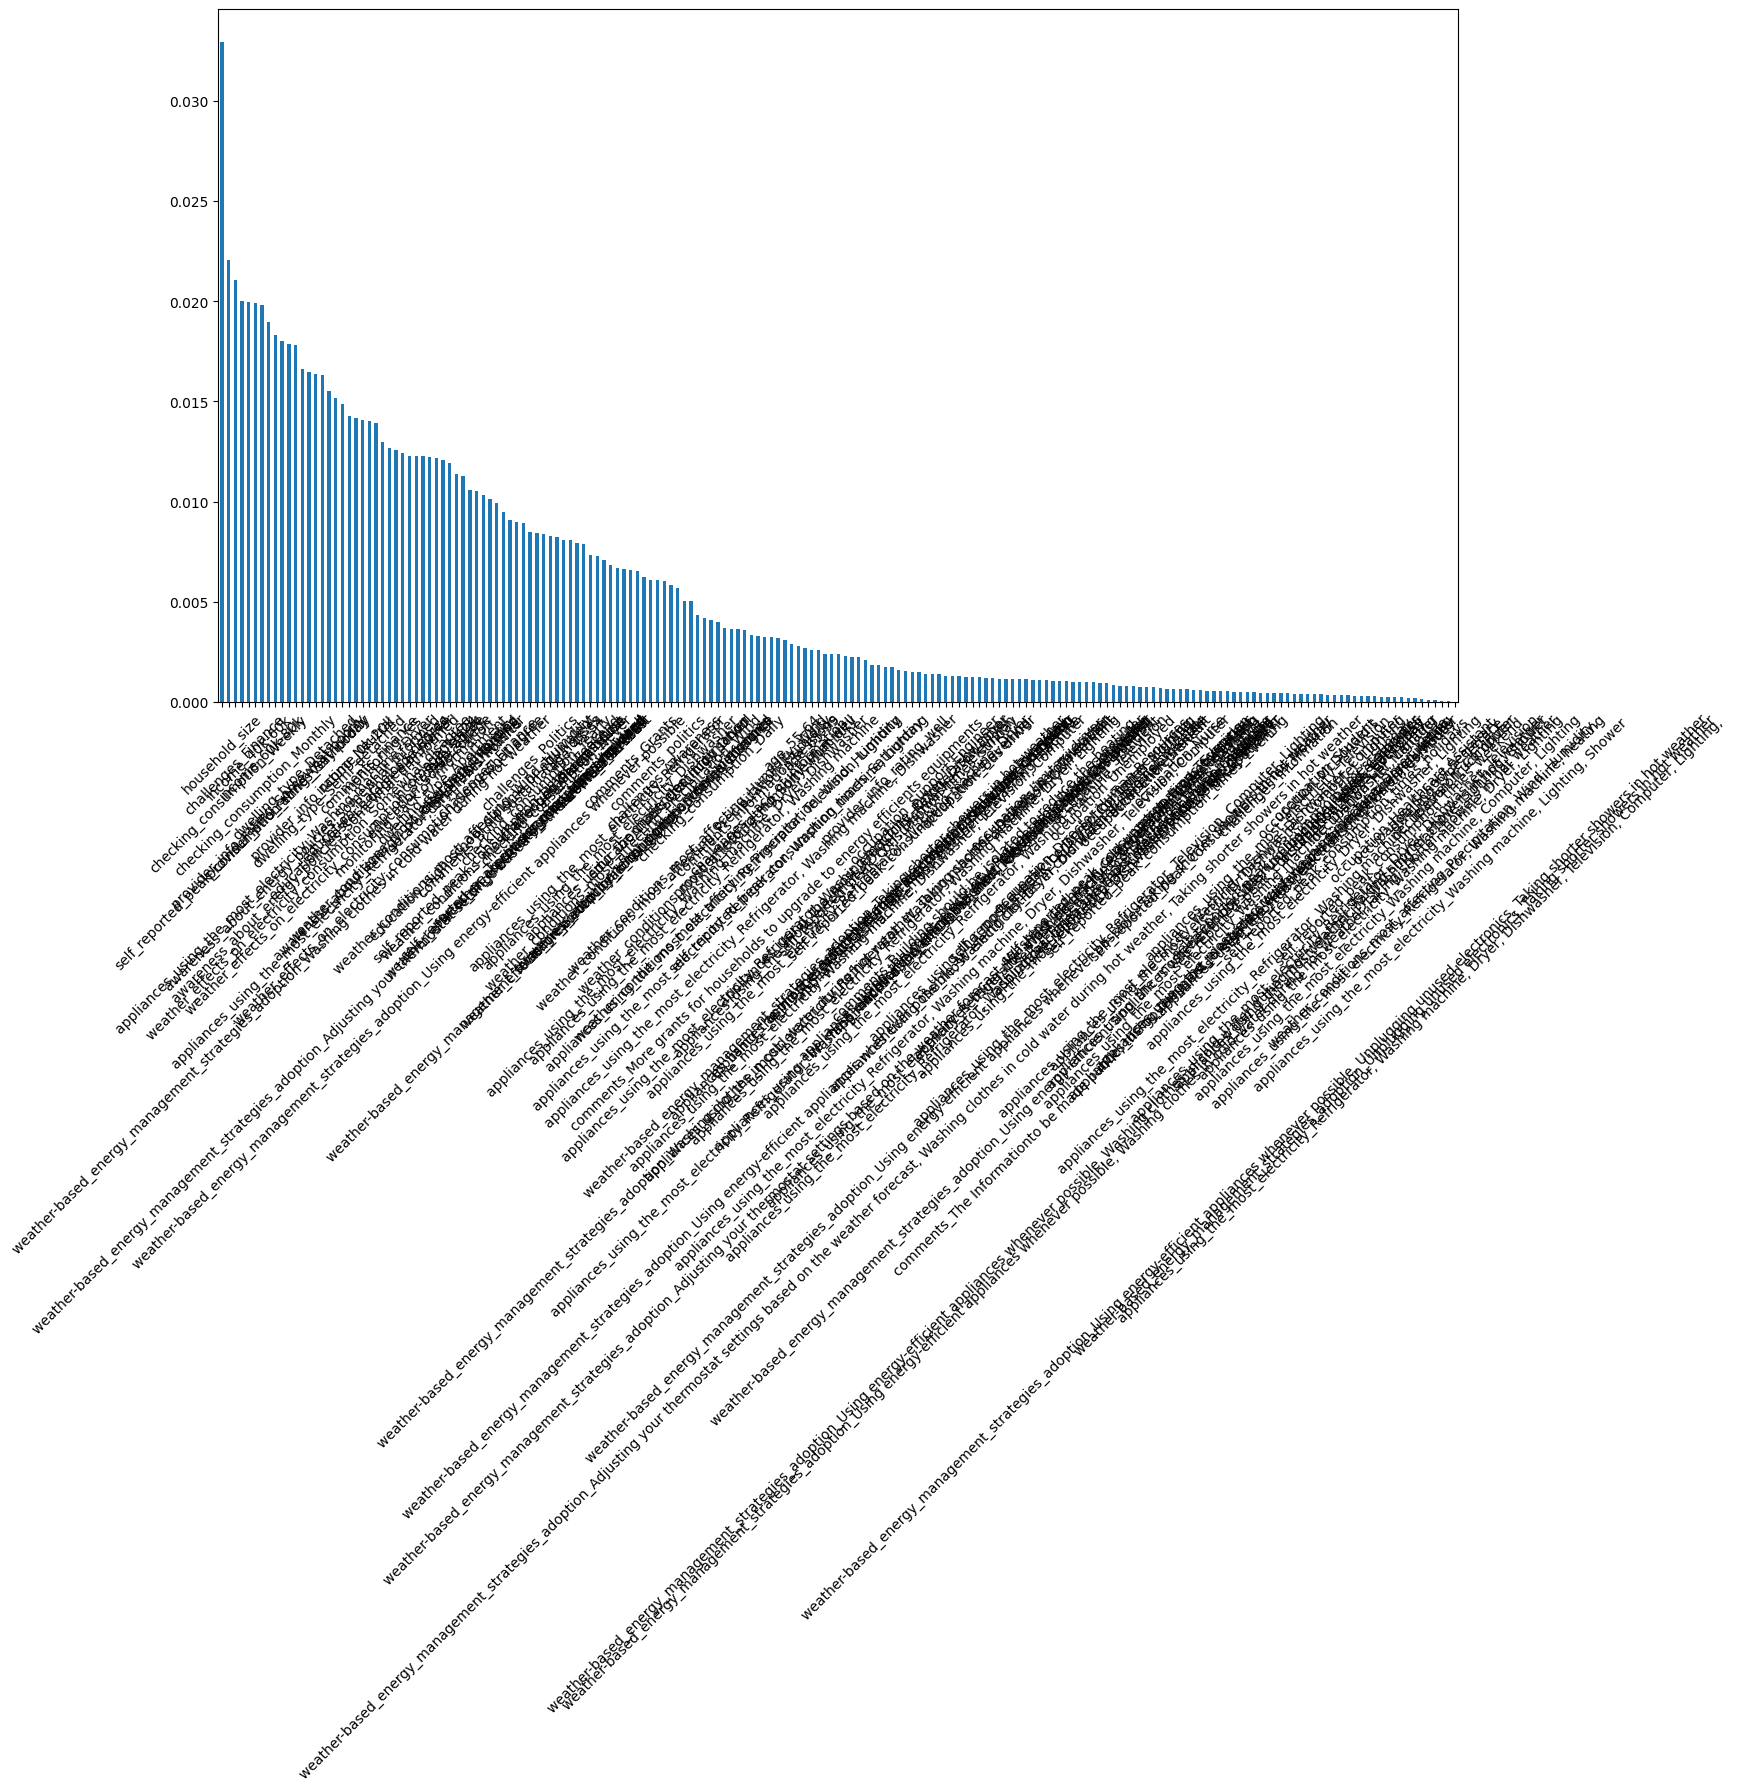

In [53]:
# X is the feature set
X_encoded = pd.get_dummies(X)

model = RandomForestClassifier()
model.fit(X_encoded, y)

# Get feature importances
importances = model.feature_importances_

# Conversion of the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X_encoded.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45)

plt.tight_layout()
plt.show()

In [54]:
# Convertion of the importances into a DataFrame
f_importances_df = pd.DataFrame(f_importances).reset_index()

# Rename the columns
f_importances_df.columns = ['Feature', 'Importance']

# Print the DataFrame
print(f_importances_df)

                                               Feature  Importance
0                                       household_size    0.032918
1                          checking_consumption_Weekly    0.022062
2                                   challenges_Finance    0.021044
3       self_reported_peak_consumption_times_Sathurday    0.020016
4                                       income_40k-60k    0.019940
..                                                 ...         ...
180                       occupation_School Secretary     0.000109
181  weather_conditions_most_affecting_Precipitatio...    0.000102
182  appliances_using_the_most_electricity_Washing ...    0.000068
183                             dwelling_type_Terrace     0.000045
184                           occupation_Truck driver     0.000023

[185 rows x 2 columns]
